In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Yeah, I want a clean file for this

In [3]:
def sing_col_analysis(target, col_anal=12):
    #target += 1
    name = df.columns[target]
    print(f"{name} is a {df.dtypes[target]} that has {len(df[name].unique())} unique and {df[name].isnull().sum()} null values.")
    #insert line about outliers? Well, could potentially add to the table if relevant.... hmm guess we'll see
    print(df[name].describe())
    curr_col_analysis = df[name].value_counts().reset_index()
    curr_col_analysis['proportion'] = round(df[name].value_counts(normalize=True).reset_index()['proportion'], 3)
    print(curr_col_analysis[:min(col_anal, curr_col_analysis.shape[0])])

In [4]:
#Insert re. double col analysis

In [5]:
def corr_looker(df, col_no, noes=.1, highs=.51): #The first formula of interest, the correlation looker
    if df[df.columns[col_no]].dtype != 'float64' or df[df.columns[col_no]].dtype != 'int64':
        corr_target = df.corr(numeric_only=True)
        print(f"{corr_target[df.columns[col_no]].min()} is {df.columns[col_no]}'s minimum correlation with {corr_target[df.columns[col_no]].reset_index().min()[0]}")
        print('~'*45)
        print(corr_target[corr_target[df.columns[col_no]].between(-noes, noes)][df.columns[col_no]])
        print('~'*45)
        print(corr_target[corr_target[df.columns[col_no]] > highs ][df.columns[col_no]])
        print('~'*45)
        print(corr_target[corr_target[df.columns[col_no]] < -highs ][df.columns[col_no]])
    else:
        print(f"{df.columns[col_no]} is not a number datatype.")

In [6]:
def scatter_looker(df, target_col_no):
    cluster, remainder = len(df.columns)//4, len(df.columns)%4
    if remainder > 0:
        cluster += 1
    target_name = df.columns[target_col_no]
    #target_plot = 'scatter'
    
    for i in range(cluster):
        unit = i * 4
        print(f"Plots for the {i} cluster:")
        
        plt.figure(figsize = (16,9))
        print(f"Scatterplots for {target_name}:")
        try:
            ax1 = plt.subplot(2, 2, 1)
            ax1.scatter(df[df.columns[target_col_no]], df[df.columns[unit+0]])
            cur_corr = round(df[df.columns[target_col_no]].corr(df[df.columns[unit+0]]),3)
            ax1.set_title(f"vs. {df.columns[unit+0]}, the {unit+0}th column. with a correlation of: {cur_corr}")
        except:
            ax1 = plt.subplot(2, 2, 1)
            ax1.set_title(f"vs. {df.columns[unit+0]}, theoretically.")
        
        try:
            ax2 = plt.subplot(2, 2, 2)
            ax2.scatter(df[df.columns[target_col_no]], df[df.columns[unit+1]])
            cur_corr = round(df[df.columns[target_col_no]].corr(df[df.columns[unit+1]]),3)
            ax2.set_title(f"vs. {df.columns[unit+1]}, the {unit+1}th column. with a correlation of: {cur_corr}")
        except:
            pass
        
        try:
            ax3 = plt.subplot(2, 2, 3)
            ax3.scatter(df[df.columns[target_col_no]], df[df.columns[unit+2]])
            cur_corr = round(df[df.columns[target_col_no]].corr(df[df.columns[unit+2]]),3)
            ax3.set_title(f"vs. {df.columns[unit+2]}, the {unit+2}th column. with a correlation of: {cur_corr}")
        except:
            pass
        
        try:
            ax4 = plt.subplot(2, 2, 4)
            ax4.scatter(df[df.columns[target_col_no]], df[df.columns[unit+3]])
            cur_corr = round(df[df.columns[target_col_no]].corr(df[df.columns[unit+3]]),3)
            ax4.set_title(f"vs. {df.columns[unit+3]}, the {unit+3}th column. with a correlation of: {cur_corr}")
        except:
            pass
        
        plt.tight_layout();
        print('`'*26)
        print('`'*26)
#     while remainder > 0:
#         plt.figure(figsize = (16,9))
#         #Not as elegant, but it'll get the job done easly.
#         plt.scatter(df[df.columns[target_col_no]], df[df.columns[unit+0]])
#         plt.set_title(f"{target_name} vs. {df.columns[unit+0]}");
#         print('`'*26)
#         print('`'*26)
#         remainder -= 1

In [7]:
df = pd.read_csv('../../data/all_monthly_data_clean.csv')
# df = pd.read_csv('../data/all_monthly_data_clean.csv')
print(df.shape)
df #What is happening to our data........well I know, but I'm not writing more than this.

(288, 47)


,date,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,cpi,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
0,2019-12-01,331345000.0,3.6,2.976407,2.285130,256.974,3.226840,3.437022,4.619287,1.807531,...,3.510450e+11,1.141310e+11,2.228563e+12,1.445443e+12,3.788137e+12,.,3.7200,NaN,NaN,NaN
1,2019-11-01,331213000.0,3.6,3.316327,2.051278,257.208,3.315695,-0.590061,4.272018,2.000165,...,3.493480e+11,1.144740e+11,2.222931e+12,1.445227e+12,3.782632e+12,14.87,3.6950,NaN,NaN,NaN
2,2019-10-01,331066000.0,3.6,3.142126,1.764043,257.346,3.355015,-4.166427,4.292580,2.073456,...,3.488320e+11,1.147100e+11,2.209687e+12,1.438320e+12,3.762717e+12,.,3.6880,2.93,1.46,760.36
3,2019-09-01,330904000.0,3.5,3.111274,1.711305,256.759,3.506051,-4.751840,3.418900,1.788571,...,3.494810e+11,1.148640e+11,2.194830e+12,1.429200e+12,3.738894e+12,.,3.6050,NaN,NaN,NaN
4,2019-08-01,330729000.0,3.6,3.419118,1.749780,256.558,3.352060,-4.389285,3.384868,1.705389,...,3.506330e+11,1.149560e+11,2.197049e+12,1.426682e+12,3.738687e+12,15.1,3.6160,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-05-01,331701000.0,13.2,6.676238,0.117926,256.394,2.562970,-18.911473,4.912065,4.001782,...,2.758240e+11,1.071530e+11,2.111012e+12,1.401595e+12,3.619760e+12,14.52,3.2325,NaN,NaN,NaN
284,2020-04-01,331699000.0,14.8,8.027358,0.329097,256.389,2.614179,-17.716035,4.815076,3.511338,...,2.935450e+11,1.069250e+11,2.050323e+12,1.362107e+12,3.519355e+12,.,3.3060,2.40,1.32,654.76
285,2020-03-01,331642000.0,4.4,3.489209,1.539327,258.115,3.012954,-5.739075,4.741351,1.933852,...,3.252100e+11,1.068430e+11,2.218502e+12,1.450445e+12,3.775790e+12,.,3.4500,NaN,NaN,NaN
286,2020-02-01,331525000.0,3.5,3.031397,2.334874,258.678,3.323537,2.769064,4.656250,1.809332,...,3.484030e+11,1.069140e+11,2.285301e+12,1.482739e+12,3.874954e+12,15.09,3.4650,NaN,NaN,NaN


In [8]:
#Remember, to assume that even if there are dates they aren't sorted in order:
df = df.sort_values('date')

In [9]:
df.columns[df.columns.str.contains('cc')]

Index(['cc_rate_all_ns', 'cc_bals_30d_due_percentage',
       'cc_bals_90d_due_percentage', 'cc_balance_total_billions'],
      dtype='object')

In [10]:
df.dtypes[42], df.columns[42]

(dtype('O'), 'cc_rate_all_ns')

In [11]:
df[df.columns[28]][:2]

239   NaN
238   NaN
Name: unemployment_insurance, dtype: float64

In [12]:
for i in range(len(df.columns)):#Eh, we'll go with that.
    if df[df.columns[i]].isnull().sum() > 12:
        print(i, df[df.columns[i]].isnull().sum())
    

3 86
44 243
45 243
46 243


In [13]:
df.columns.get_loc('unemployment_insurance') #So it seems I'm supposed to start from here, if after the medis.... Fine.
#Who cares, let's do this!

28

In [14]:
df.corr(numeric_only=True)[df.columns[46]].reset_index().min()

index                        all_less_food_&_shelter_yoy
cc_balance_total_billions                      -0.549534
dtype: object

In [15]:
#Hmm, besides the groupby thing.... and of course the graphs.... let us see the correlation

In [16]:
##Perhaps I should have elsewhere, but regardless:

corr_table = []
neg_corrs, sig_corrs = .1, .51
# for i in range(len(df.columns)):
#     #i
#     name = df.columns[i]
    

In [17]:
corr_df = df.corr(numeric_only=True)
corr_df.head()

,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,cpi,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,...,total_all_personal_outlays,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
population,1.000000,-0.154107,0.545719,0.144376,0.954757,0.283372,-0.091659,-0.609689,0.173093,-0.053301,...,0.943714,0.641804,0.968624,0.888588,0.925395,0.910074,-0.640766,-0.214876,-0.257498,0.821190
unemployment_rate,-0.154107,1.000000,-0.290368,-0.428050,-0.152324,-0.727565,-0.210652,0.119006,-0.228208,-0.139272,...,-0.320127,-0.458979,-0.308975,-0.418540,-0.364900,-0.401422,-0.324767,-0.061295,0.086492,-0.549534
hourly_earnings_yoy,0.545719,-0.290368,1.000000,0.496653,0.678464,0.564938,0.130549,-0.060885,0.650596,0.067919,...,0.675786,0.496268,0.681942,0.721594,0.721584,0.727904,0.156939,-0.222969,-0.204402,0.546516
cpi_yoy,0.144376,-0.428050,0.496653,1.000000,0.338108,0.473088,0.813378,0.017462,0.709975,0.750454,...,0.363634,0.276731,0.301938,0.465848,0.350620,0.427259,0.252765,-0.291977,-0.330180,0.570270
cpi,0.954757,-0.152324,0.678464,0.338108,1.000000,0.462101,0.001212,-0.613562,0.378086,0.020948,...,0.992243,0.760165,0.980559,0.944106,0.973629,0.962562,-0.514193,-0.152707,-0.211098,0.845560


In [18]:
neg_corrs, sig_corrs = .1, .5
for i in corr_df.columns:
    corr_df[i] = [1 if float(guy) > sig_corrs else guy for guy in corr_df[i]]
    corr_df[i] = [-1 if float(guy) < -sig_corrs else guy for guy in corr_df[i]]
    corr_df[i] = [0 if abs(float(guy)) < neg_corrs else guy for guy in corr_df[i]]
corr_df.head()

,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,cpi,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,...,total_all_personal_outlays,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
population,1.000000,-0.154107,1.000000,0.144376,1.000000,0.283372,0.000000,-1.000000,0.173093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,-1.000000,-0.214876,-0.257498,1.0
unemployment_rate,-0.154107,1.000000,-0.290368,-0.428050,-0.152324,-1.000000,-0.210652,0.119006,-0.228208,-0.139272,...,-0.320127,-0.458979,-0.308975,-0.418540,-0.36490,-0.401422,-0.324767,0.000000,0.000000,-1.0
hourly_earnings_yoy,1.000000,-0.290368,1.000000,0.496653,1.000000,1.000000,0.130549,0.000000,1.000000,0.000000,...,1.000000,0.496268,1.000000,1.000000,1.00000,1.000000,0.156939,-0.222969,-0.204402,1.0
cpi_yoy,0.144376,-0.428050,0.496653,1.000000,0.338108,0.473088,1.000000,0.000000,1.000000,1.000000,...,0.363634,0.276731,0.301938,0.465848,0.35062,0.427259,0.252765,-0.291977,-0.330180,1.0
cpi,1.000000,-0.152324,1.000000,0.338108,1.000000,0.462101,0.000000,-1.000000,0.378086,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,-1.000000,-0.152707,-0.211098,1.0


In [19]:
#Hmm, now what? Cluster things to group them?
# corr_df[corr_df[corr_df.columns[0]]==1][corr_df[corr_df.columns[0]]]

In [20]:
abs(float(-0.113904))

0.113904

In [21]:
corr_df.head()

,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,cpi,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,...,total_all_personal_outlays,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
population,1.000000,-0.154107,1.000000,0.144376,1.000000,0.283372,0.000000,-1.000000,0.173093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,-1.000000,-0.214876,-0.257498,1.0
unemployment_rate,-0.154107,1.000000,-0.290368,-0.428050,-0.152324,-1.000000,-0.210652,0.119006,-0.228208,-0.139272,...,-0.320127,-0.458979,-0.308975,-0.418540,-0.36490,-0.401422,-0.324767,0.000000,0.000000,-1.0
hourly_earnings_yoy,1.000000,-0.290368,1.000000,0.496653,1.000000,1.000000,0.130549,0.000000,1.000000,0.000000,...,1.000000,0.496268,1.000000,1.000000,1.00000,1.000000,0.156939,-0.222969,-0.204402,1.0
cpi_yoy,0.144376,-0.428050,0.496653,1.000000,0.338108,0.473088,1.000000,0.000000,1.000000,1.000000,...,0.363634,0.276731,0.301938,0.465848,0.35062,0.427259,0.252765,-0.291977,-0.330180,1.0
cpi,1.000000,-0.152324,1.000000,0.338108,1.000000,0.462101,0.000000,-1.000000,0.378086,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,-1.000000,-0.152707,-0.211098,1.0


In [22]:
# def scatter_looker(df, col_no, unit):
#     unit *= 4
#     target_name = df.columns[col_no]
#     #target_plot = 'scatter'

#     plt.figure(figsize = (16,9))
    
#     try:
#         ax1 = plt.subplot(2, 2, 1)
#         ax1.scatter(df[df.columns[col_no]], df[df.columns[unit+0]])
#         ax1.set_title(f"{target_name} vs. {df.columns[unit+0]}")
#     except:
#         pass
    
#     try:
#         ax2 = plt.subplot(2, 2, 2)
#         ax2.scatter(df[df.columns[col_no]], df[df.columns[unit+1]])
#         ax2.set_title(f"{target_name} vs. {df.columns[unit+1]}")
#     except:
#         pass
    
#     try:
#         ax3 = plt.subplot(2, 2, 3)
#         ax3.scatter(df[df.columns[col_no]], df[df.columns[unit+2]])
#         ax3.set_title(f"{target_name} vs. {df.columns[unit+2]}")
#     except:
#         pass
    
#     try:
#         ax4 = plt.subplot(2, 2, 4)
#         ax4.scatter(df[df.columns[col_no]], df[df.columns[unit+3]])
#         ax4.set_title(f"{target_name} vs. {df.columns[unit+3]}")
#     except:
#         pass
    
#     plt.tight_layout();

In [23]:
corr_looker(df, 1)

-0.6407659900678949 is population's minimum correlation with all_less_food_&_shelter_yoy
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
energy_yoy     -0.091659
gasoline_yoy   -0.053301
imports_yoy    -0.072514
Name: population, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
population                                                         1.000000
hourly_earnings_yoy                                                0.545719
cpi                                                                0.954757
total_personal_income                                              0.949205
total_employee_compensation                                        0.941721
wages_and_salaries_all                                             0.932866
wages_salaries_private_employees                                   0.925828
wages_salaries_government_employees                                0.962821
employer_contributions_for_employee_pension_and_insurance_funds    0.984576
employer_contributions_for_

In [24]:
corr_looker(df, 28, highs=.51)

-0.3548784112740993 is unemployment_insurance's minimum correlation with all_less_food_&_shelter_yoy
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
medical_care_yoy               0.015109
food_yoy                       0.025687
imports_yoy                   -0.037372
all_less_food_&_shelter_yoy   -0.042655
personal_interest_payments    -0.079631
Name: unemployment_insurance, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
unemployment_insurance                                           1.000000
total_personal_savings                                           0.705786
personal_saving_as_a_percentage_of_disposable_personal_income    0.721666
Name: unemployment_insurance, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Series([], Name: unemployment_insurance, dtype: float64)


In [25]:
test = .51
print(-test)

-0.51


Plots for the 0 cluster:
Scatterplots for unemployment_insurance:
``````````````````````````
``````````````````````````
Plots for the 1 cluster:
Scatterplots for unemployment_insurance:
``````````````````````````
``````````````````````````
Plots for the 2 cluster:
Scatterplots for unemployment_insurance:
``````````````````````````
``````````````````````````
Plots for the 3 cluster:
Scatterplots for unemployment_insurance:
``````````````````````````
``````````````````````````
Plots for the 4 cluster:
Scatterplots for unemployment_insurance:
``````````````````````````
``````````````````````````
Plots for the 5 cluster:
Scatterplots for unemployment_insurance:
``````````````````````````
``````````````````````````
Plots for the 6 cluster:
Scatterplots for unemployment_insurance:
``````````````````````````
``````````````````````````
Plots for the 7 cluster:
Scatterplots for unemployment_insurance:
``````````````````````````
``````````````````````````
Plots for the 8 cluster:
Scatterplots fo

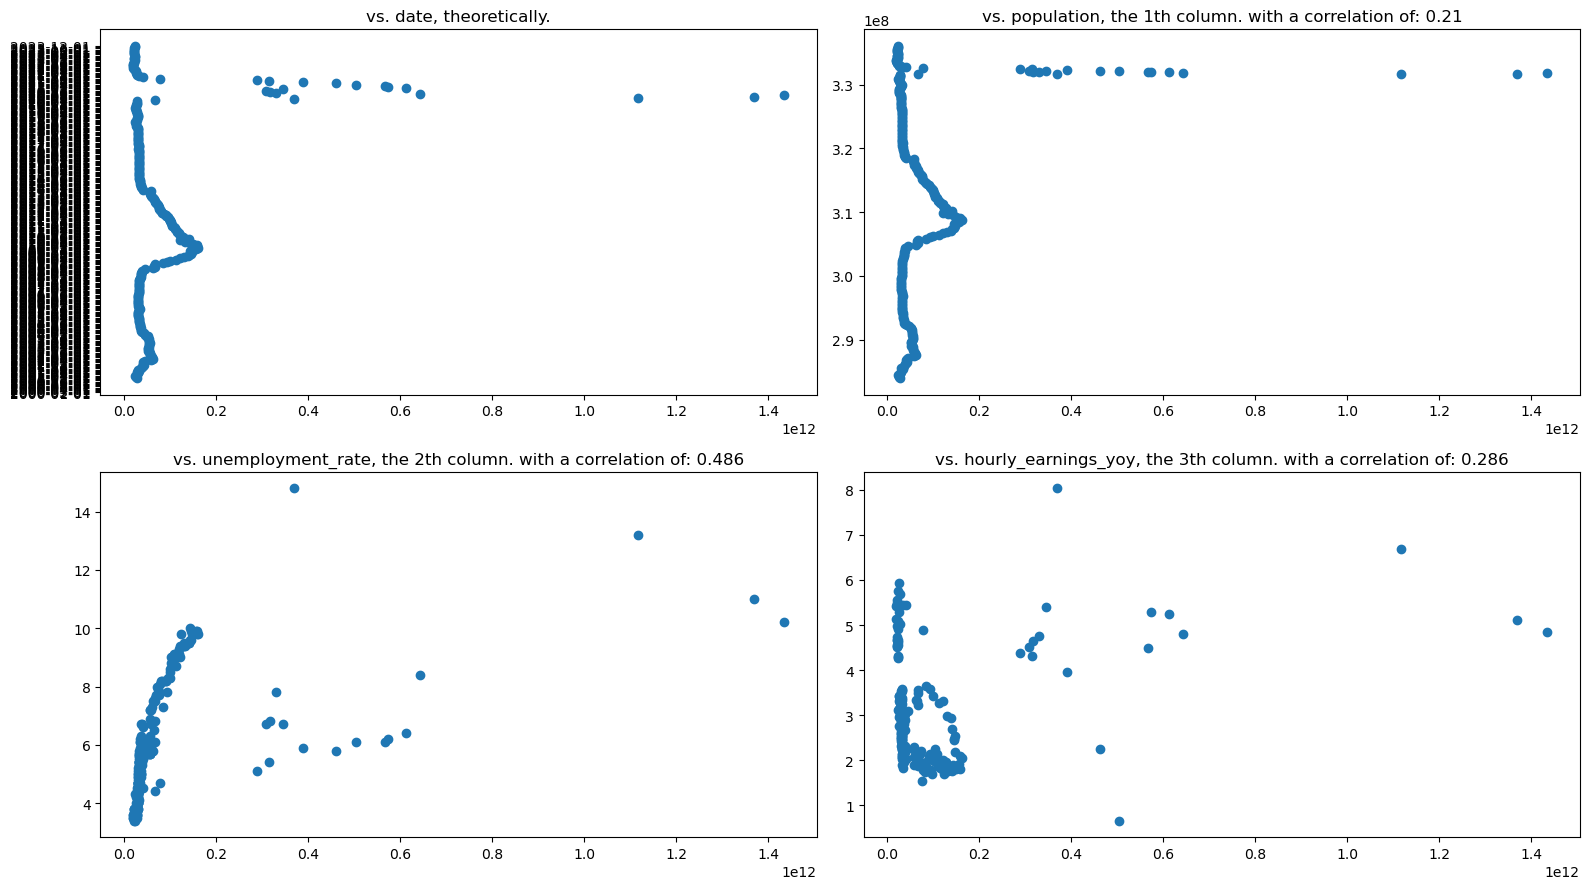

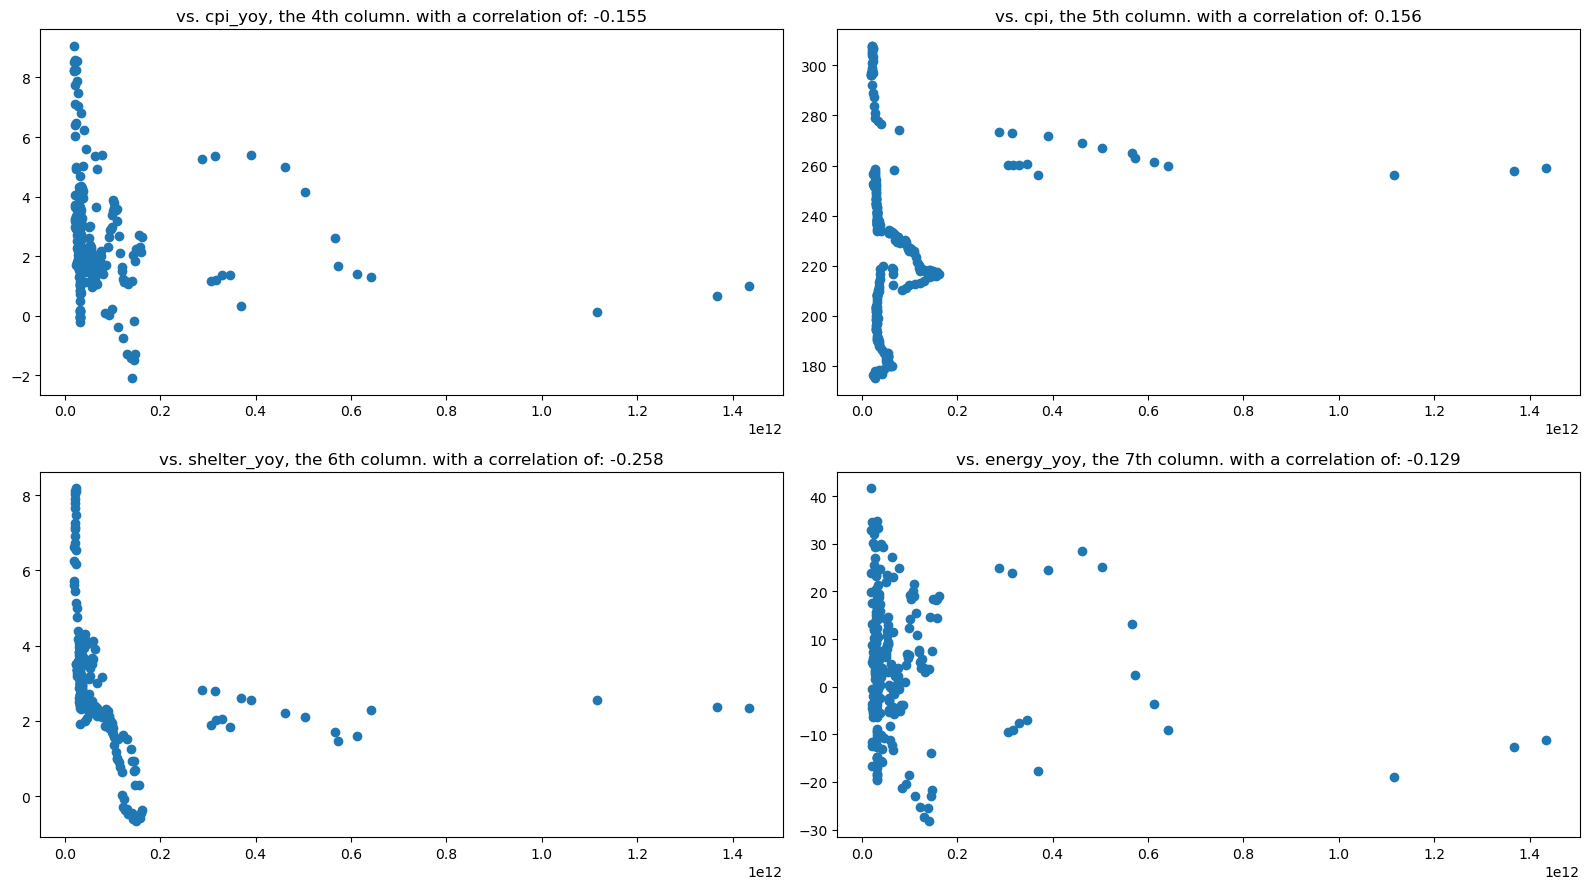

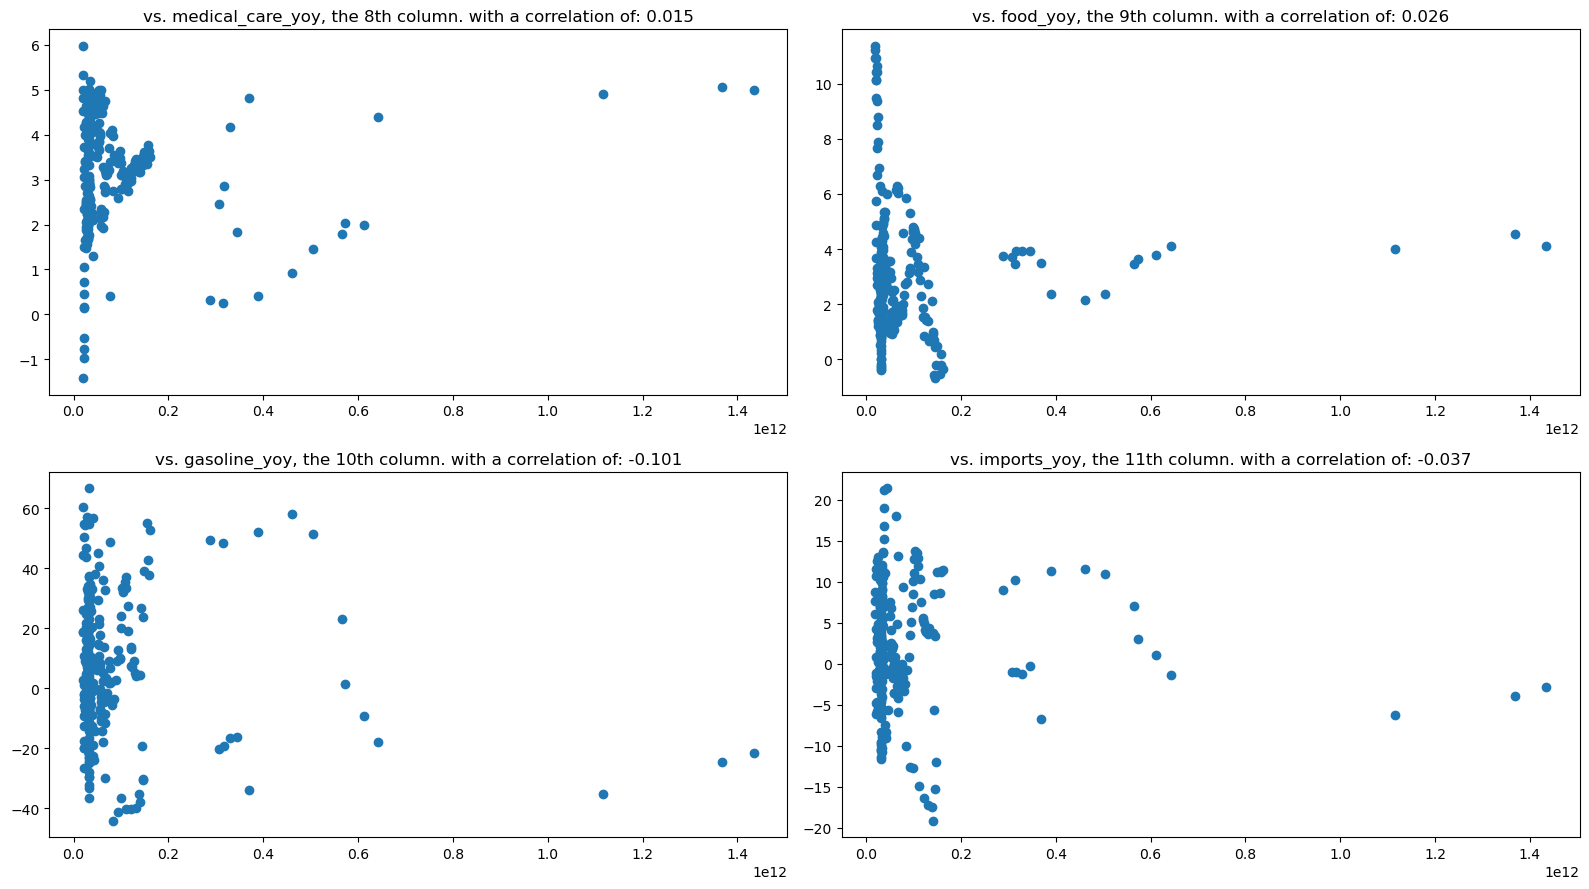

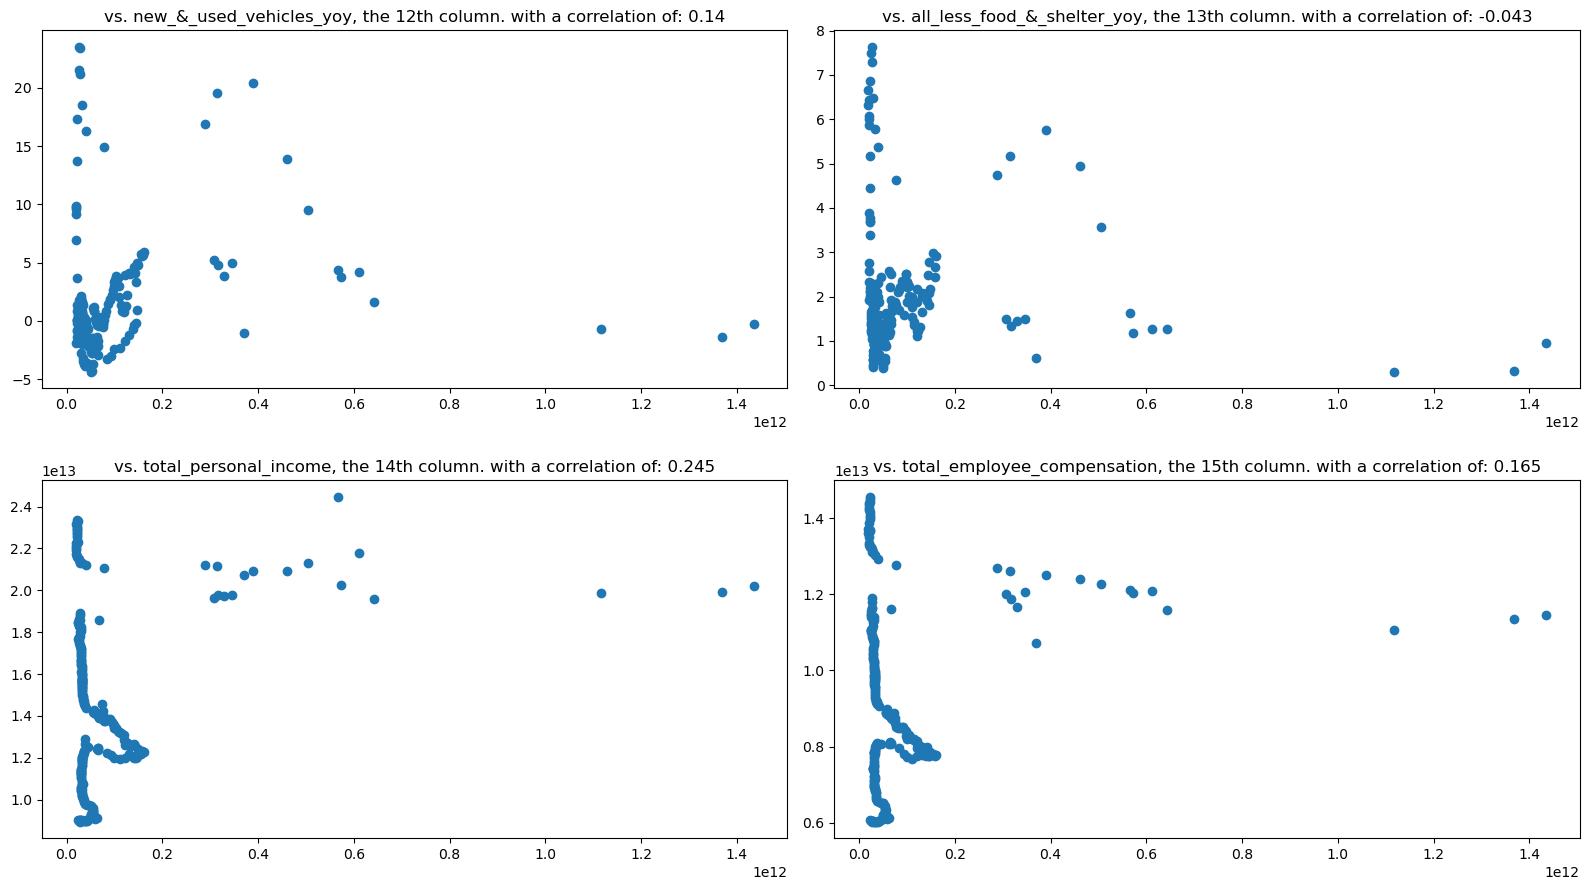

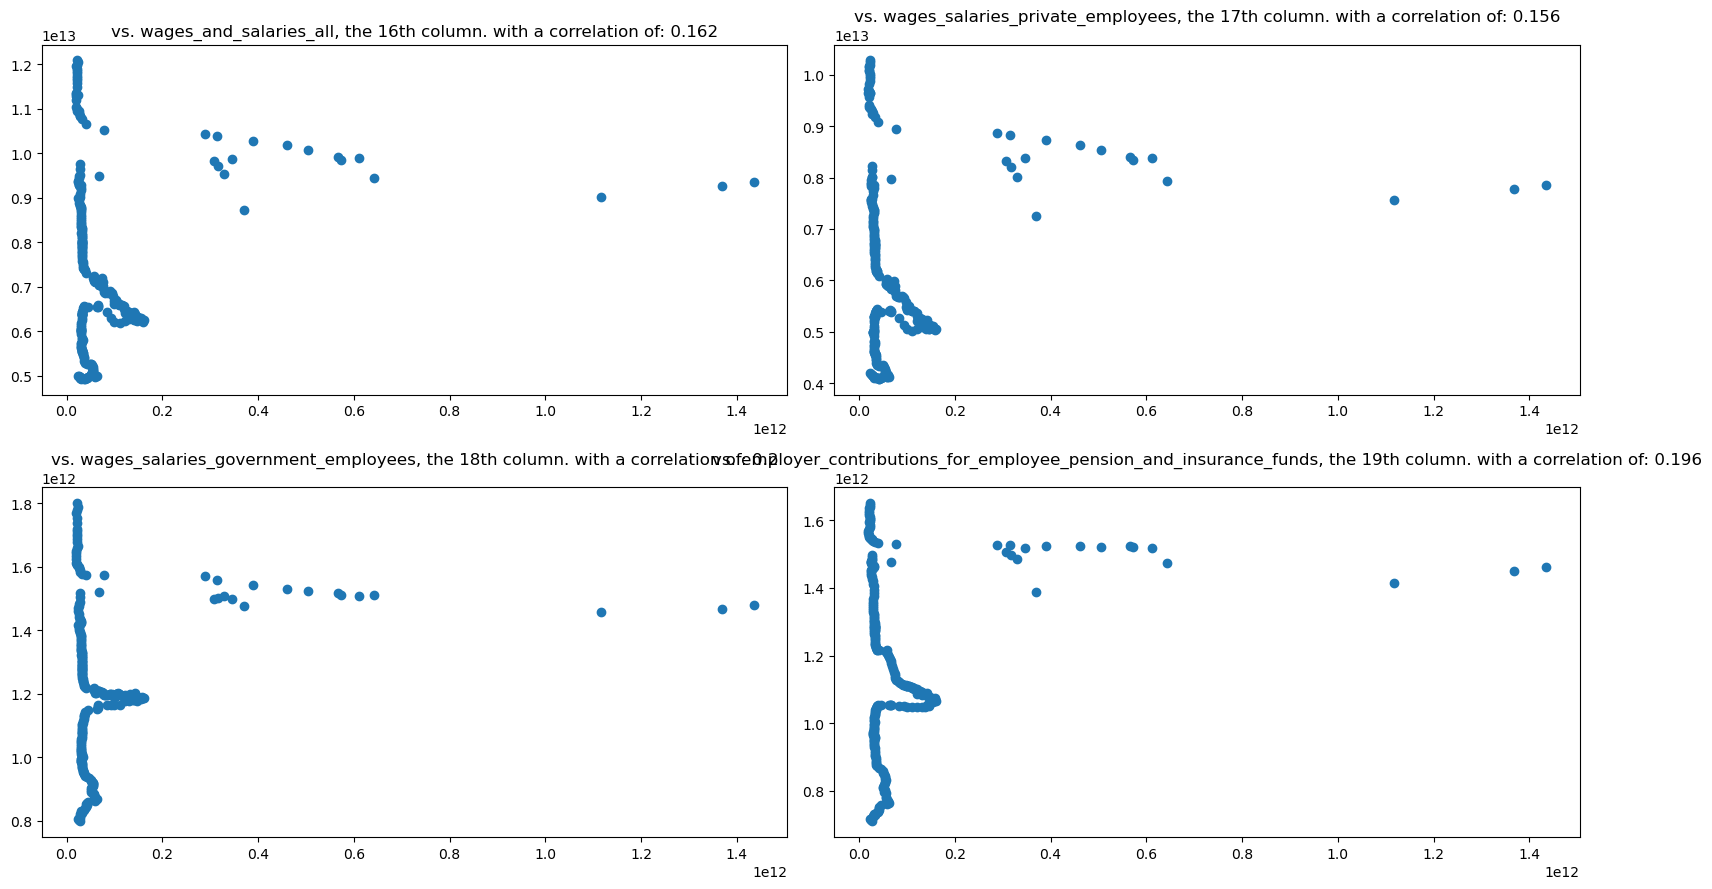

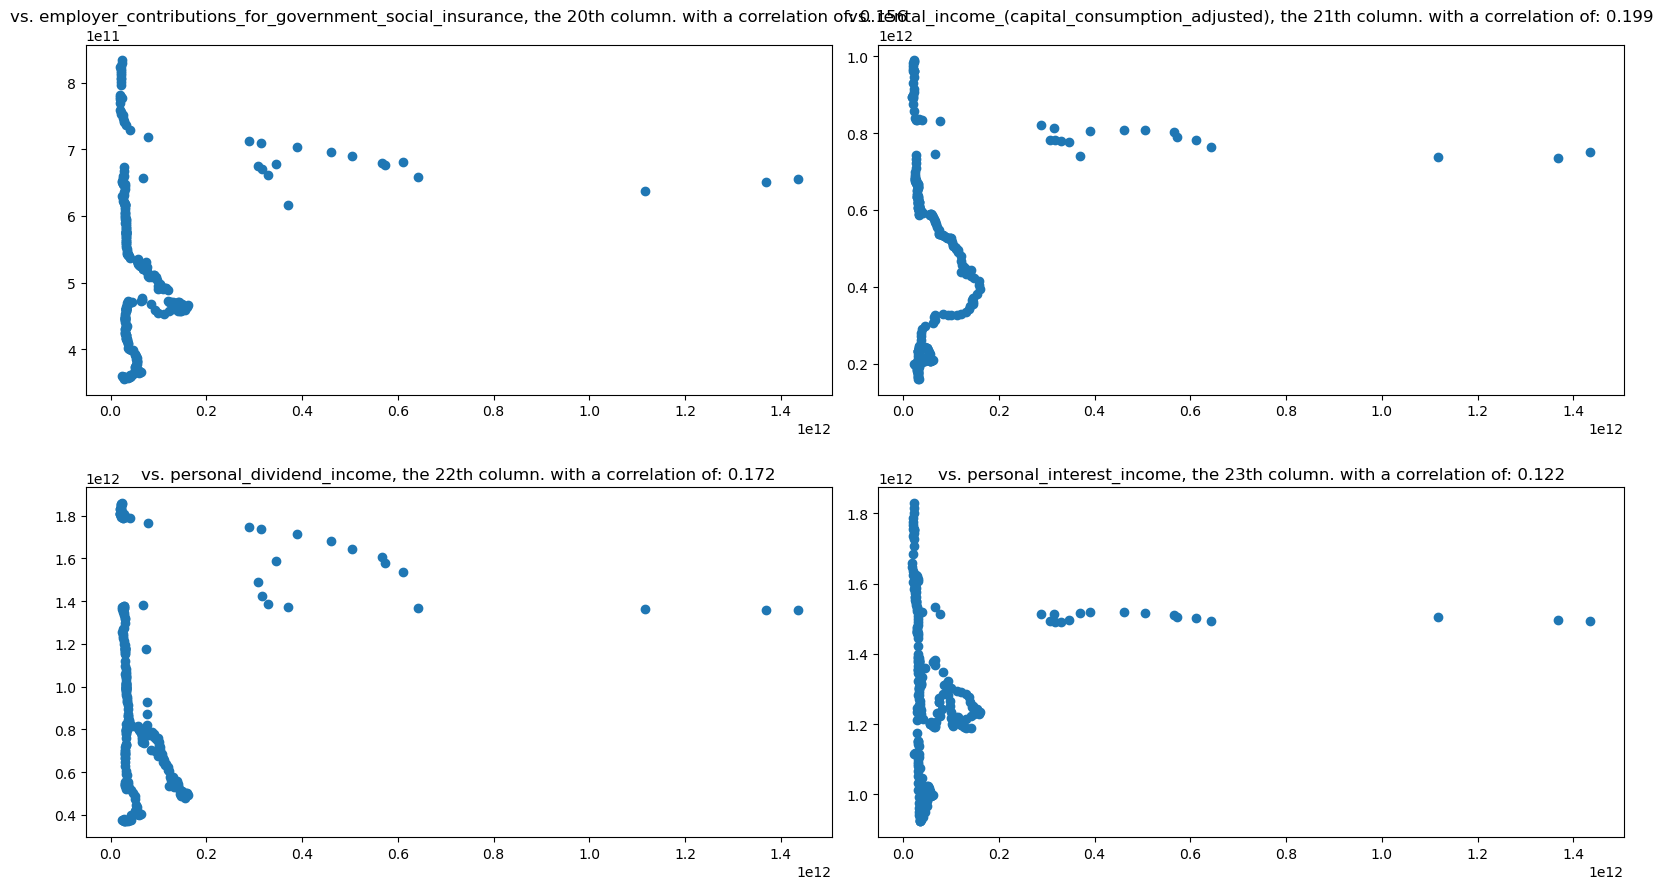

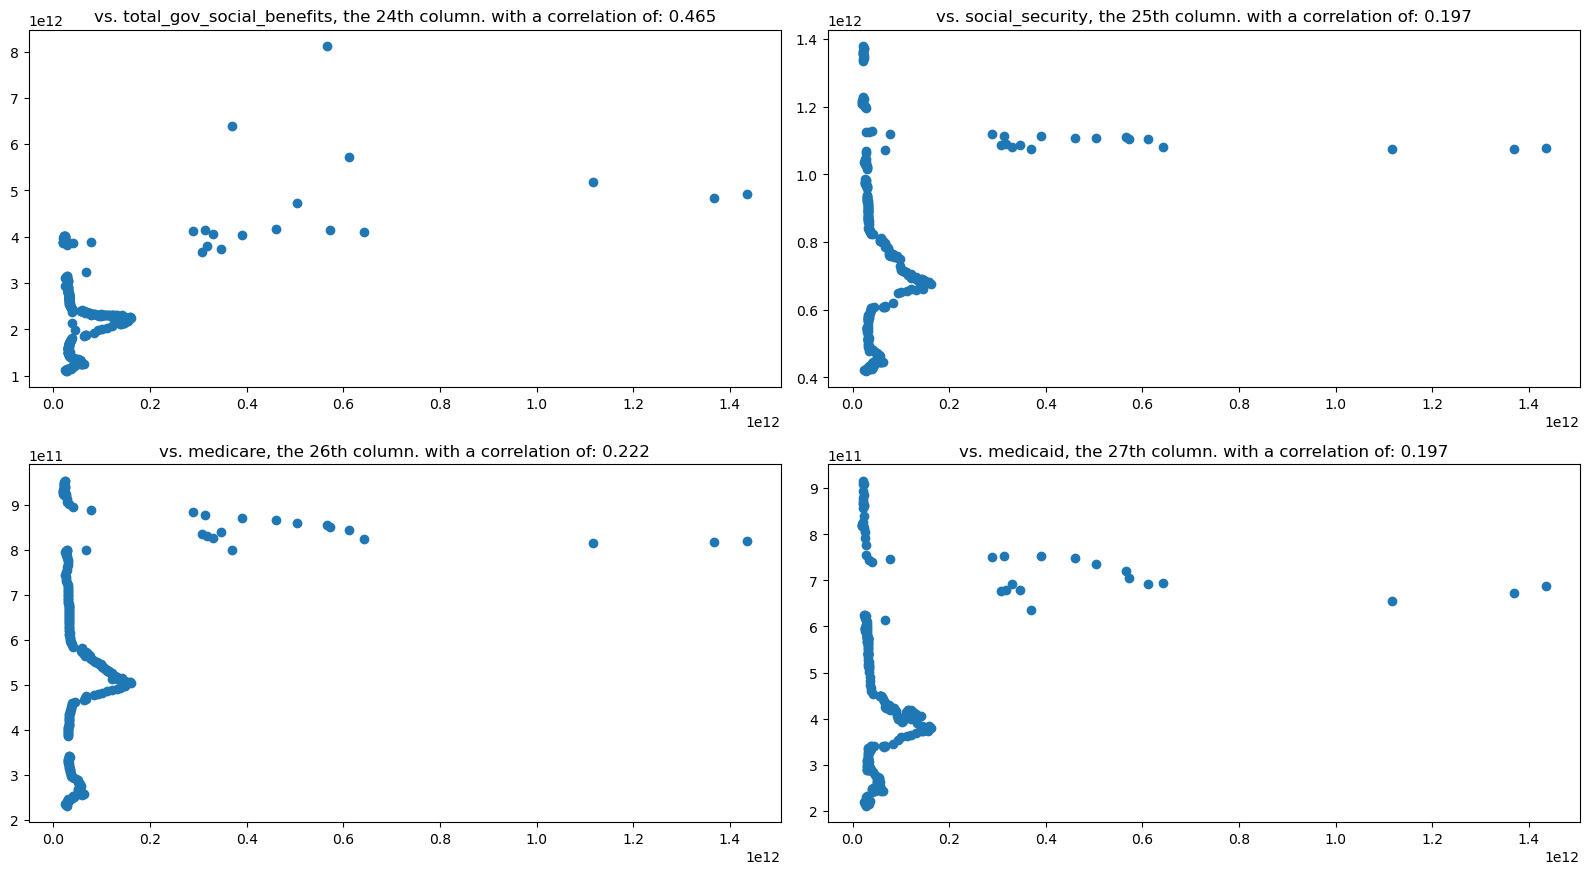

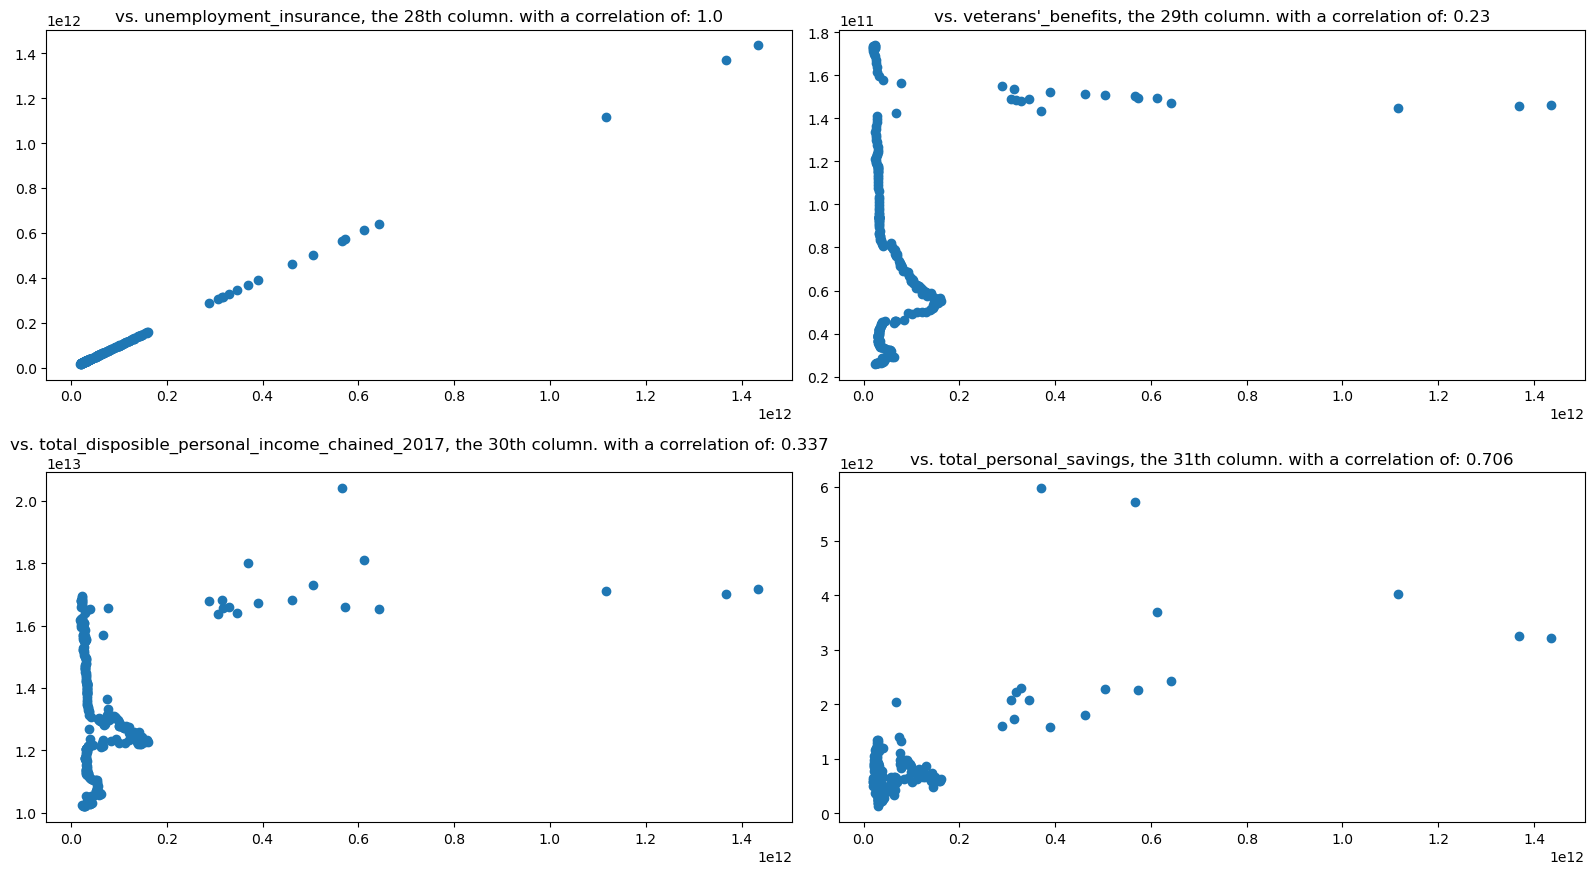

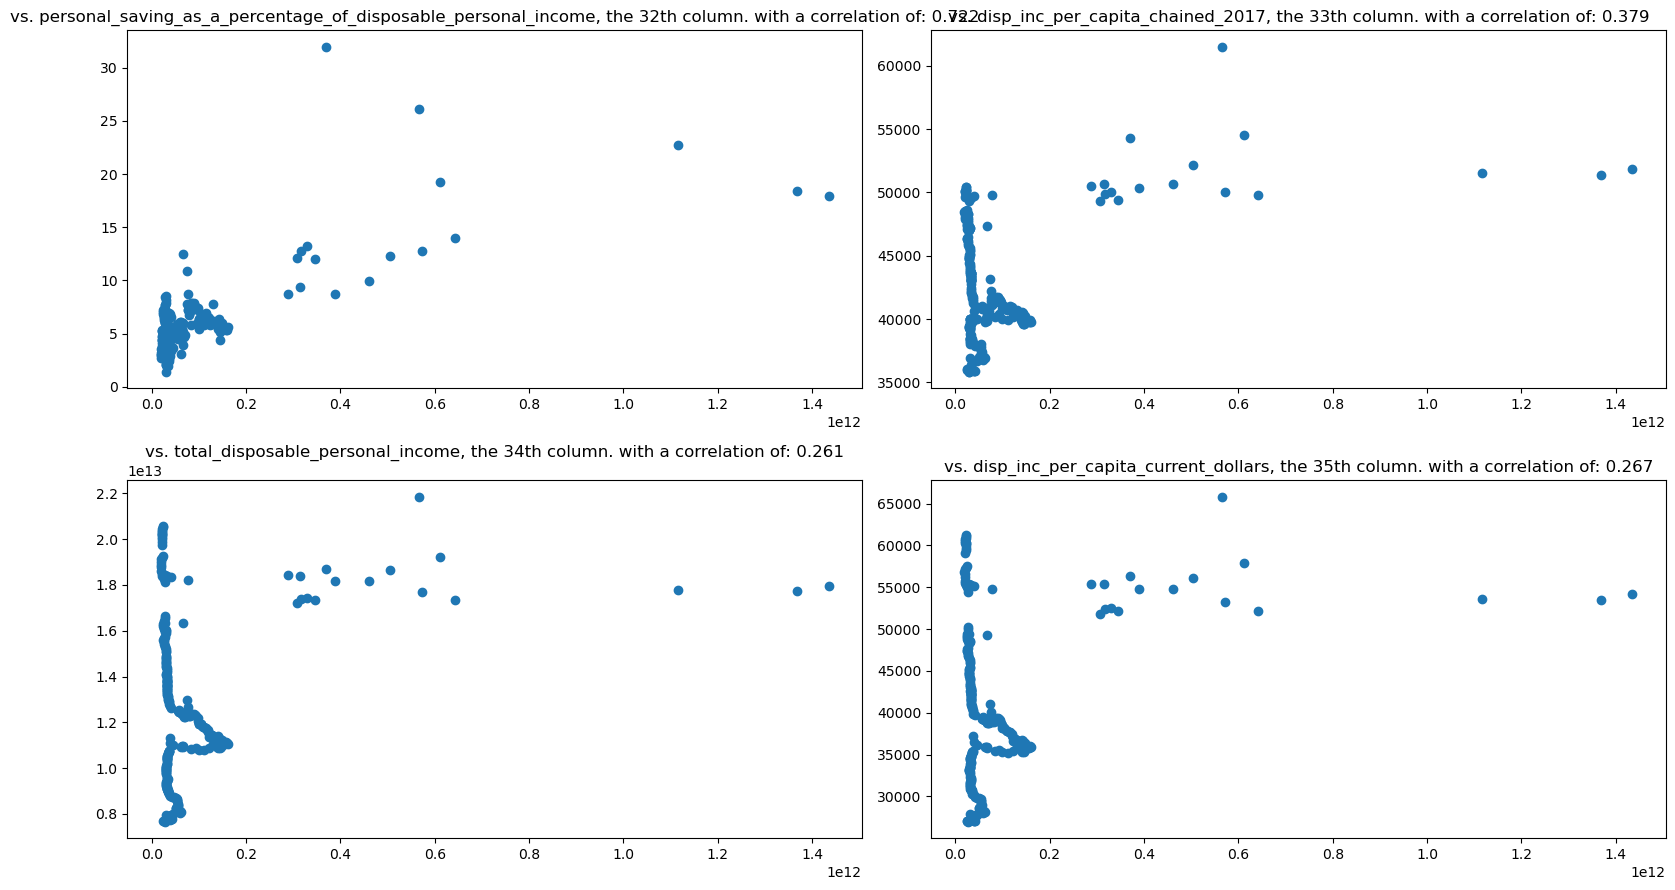

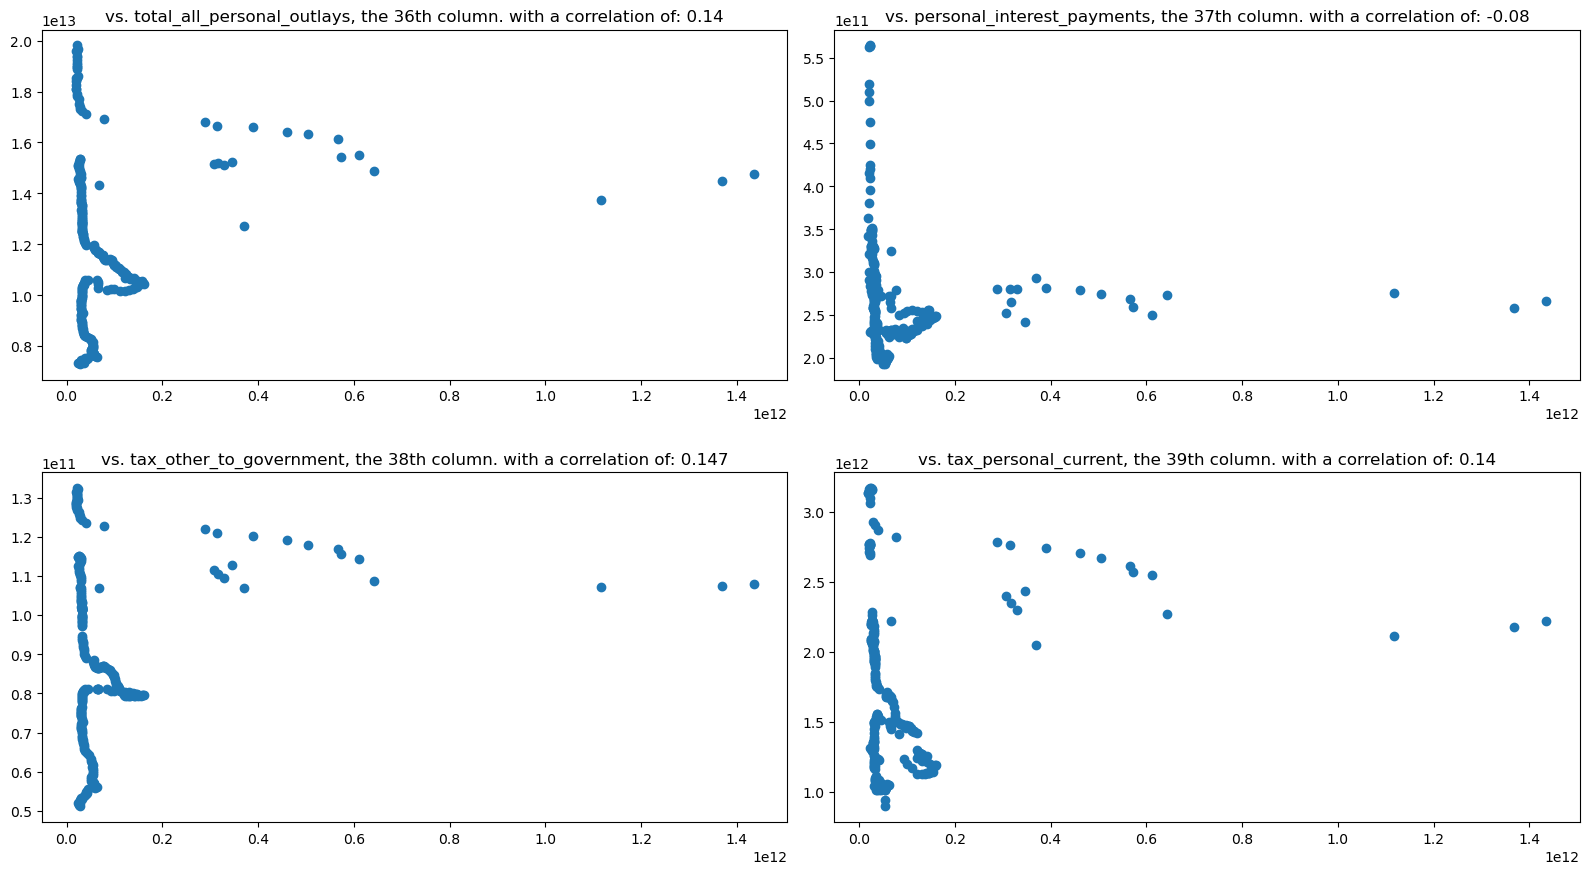

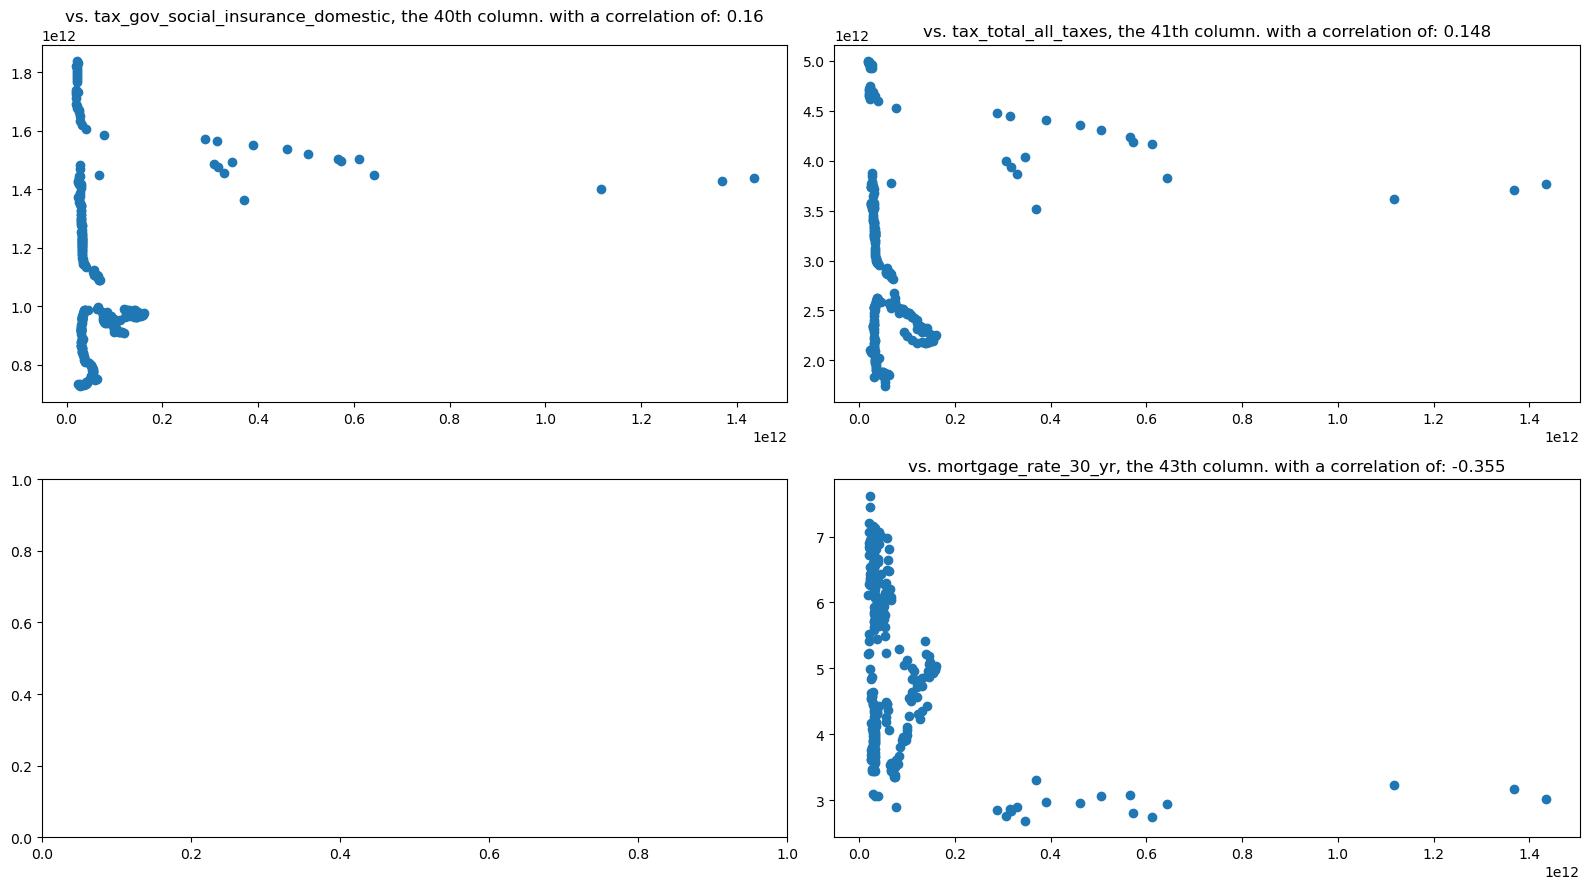

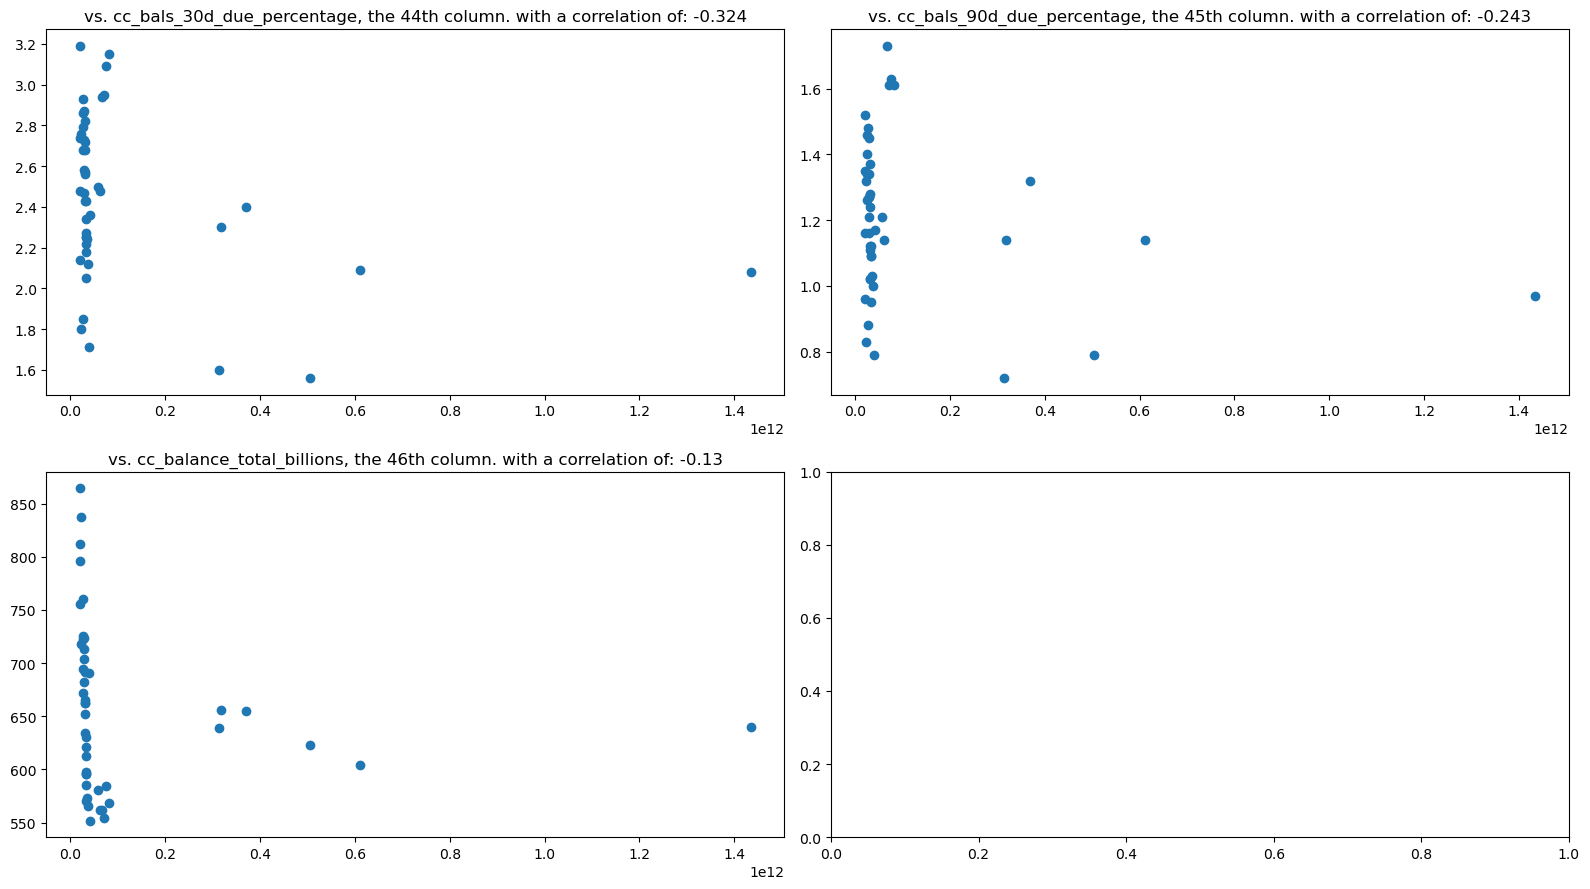

In [26]:
scatter_looker(df, 28)

In [27]:
corr_looker(df, 29, highs=.51)

-0.5645576014130883 is veterans'_benefits's minimum correlation with all_less_food_&_shelter_yoy
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
energy_yoy     -0.009320
gasoline_yoy    0.008886
imports_yoy    -0.045859
Name: veterans'_benefits, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
population                                                         0.941327
hourly_earnings_yoy                                                0.697979
cpi                                                                0.968853
total_personal_income                                              0.989893
total_employee_compensation                                        0.987759
wages_and_salaries_all                                             0.987103
wages_salaries_private_employees                                   0.986765
wages_salaries_government_employees                                0.968062
employer_contributions_for_employee_pension_and_insurance_funds    0.971081
employer_co

Plots for the 0 cluster:
Scatterplots for veterans'_benefits:


KeyboardInterrupt: 

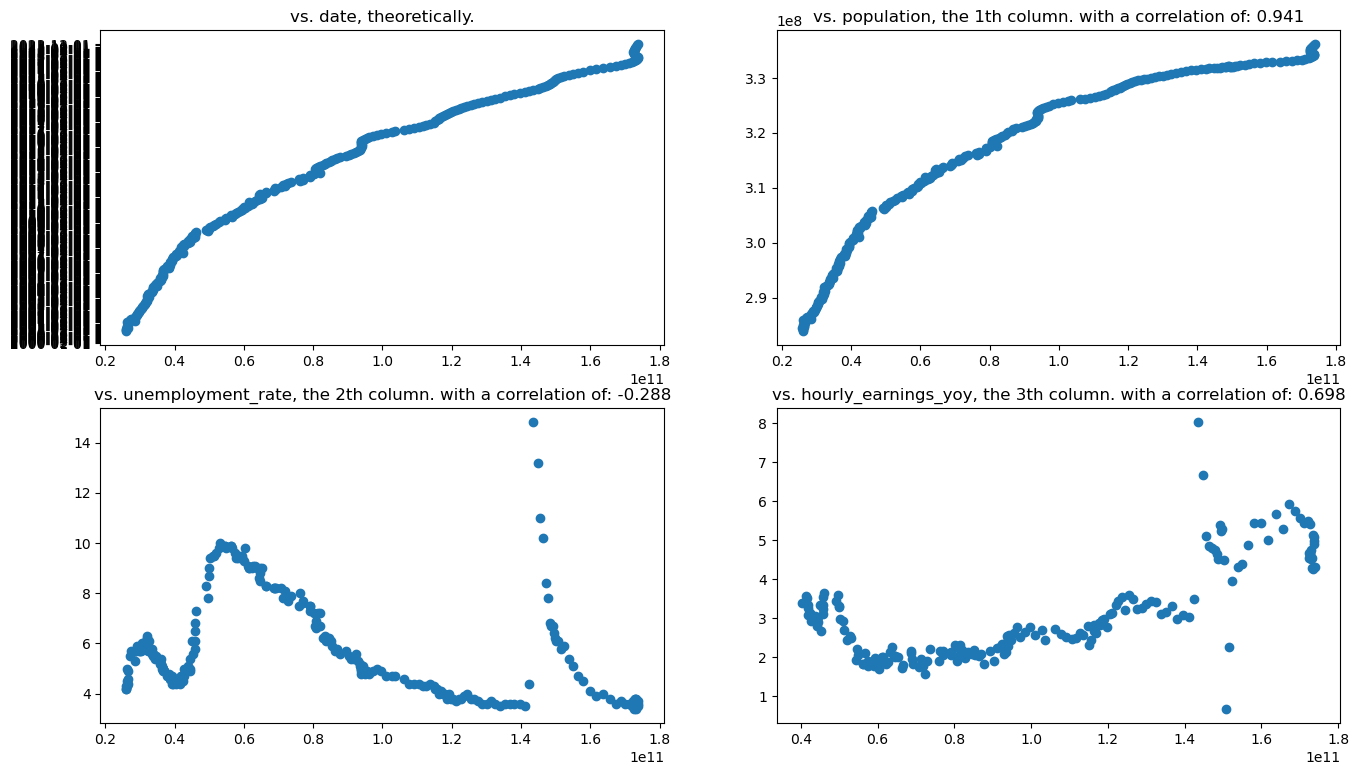

In [28]:
scatter_looker(df, 29)

In [ ]:
corr_looker(df, 30, highs=.51)

In [ ]:
scatter_looker(df, 30)

In [ ]:
corr_looker(df, 31, highs=.51)

In [ ]:
scatter_looker(df, 31)

In [ ]:
corr_looker(df, 32, highs=.51)

In [ ]:
scatter_looker(df, 32)

In [ ]:
corr_looker(df, 33, highs=.51)

In [ ]:
scatter_looker(df, 33)

In [ ]:
corr_looker(df, 34, highs=.51)

In [ ]:
scatter_looker(df, 34)

In [ ]:
corr_looker(df, 35, highs=.51)

In [ ]:
scatter_looker(df, 35)

In [ ]:
corr_looker(df, 36)

In [ ]:
scatter_looker(df, 36)

In [ ]:
corr_looker(df, 37, highs=.51)

In [ ]:
scatter_looker(df, 37)

In [ ]:
corr_looker(df, 38, highs=.51)

In [ ]:
scatter_looker(df, 38)

In [ ]:
corr_looker(df, 39, highs=.51)

In [ ]:
scatter_looker(df, 39)

In [ ]:
corr_looker(df, 40)

In [ ]:
scatter_looker(df, 40)

In [ ]:
corr_looker(df, 41)

In [ ]:
print(df.columns[42])
# corr_looker(df, 42) #error with this one... recall what happened earlier...

In [ ]:
corr_looker(df, 43)

In [ ]:
# df.corr(numeric_only=True)['mortgage_rate_30_yr']

In [ ]:
scatter_looker(df, 43)

In [ ]:
corr_looker(df, 44)

In [ ]:
scatter_looker(df, 44)

In [ ]:
corr_looker(df, 45)

In [ ]:
scatter_looker(df, 45)

In [ ]:
corr_looker(df, 46)

In [ ]:
pd.corr

In [ ]:
scatter_looker(df, 46)

In [ ]:
df[df.columns[44]]

In [ ]:
df[df.columns[44]].corr(df[df.columns[1]])

In [ ]:
corr_looker(df, 44)

In [ ]:
scatter_looker(df, 44)

In [ ]:
#Yeah, we have to do some logs... when basically nothing matches up...
#We have to at least try
focus = df.drop(columns=['cc_rate_all_ns'],axis=1)
focus.set_index('date', inplace=True)
focus.head()

In [ ]:
def rooter(bro):
    if 0 > bro:
        neg=-1
    else:
        neg=1
    return neg*bro**.5

In [ ]:
df_root = pd.DataFrame()
for i in range(len(focus.columns)):
    df_root[focus.columns[i]] = focus[focus.columns[i]].apply(rooter)
df_root.head()

In [ ]:
corr_looker(df_root, 43)

In [ ]:
df_root = pd.DataFrame()
for i in range(len(focus.columns)):
    df_root[focus.columns[i]] = focus[focus.columns[i]].apply(rooter)
df_root['cc_bals_30d_due_percentage'] = focus['cc_bals_30d_due_percentage']
df_root['cc_bals_90d_due_percentage'] = focus['cc_bals_90d_due_percentage']
df_root.head()

In [ ]:
corr_looker(df_root, 43)

In [ ]:
def logger(bro):
    if 0 > bro:
        neg=-1
    else:
        neg=1
    return neg*np.log(abs(bro))

In [ ]:
df_log = pd.DataFrame()
#df_log.fillna(99999999999999999999999999999999999)
#df_log.replace(0,99999999999999999999999999999999999)
for i in range(len(focus.columns)):
    df_log[focus.columns[i]] = focus[focus.columns[i]].apply(logger)
df_log.head()

In [ ]:
corr_looker(df_log, 43)

In [ ]:
df_log = pd.DataFrame()
df_log.fillna(99999999999999999999999999999999999)
df_log.replace(0,99999999999999999999999999999999999)
for i in range(len(focus.columns)):
    df_log[focus.columns[i]] = focus[focus.columns[i]].apply(logger)
df_log['cc_bals_30d_due_percentage'] = focus['cc_bals_30d_due_percentage']
df_log['cc_bals_90d_due_percentage'] = focus['cc_bals_90d_due_percentage']
df_log.head()

In [ ]:
corr_looker(df_log, 43)

In [ ]:
eda_df = df[['cc_bals_30d_due_percentage', 'cc_bals_90d_due_percentage','unemployment_rate','medical_care_yoy','personal_interest_income','new_&_used_vehicles_yoy']]

In [ ]:
eda_df

In [ ]:
cc30 = eda_df.columns[0]

plt.figure(figsize = (12,9))
for i in range(1, 6):
    curr_corr = df[[eda_df.columns[0],eda_df.columns[i]]].corr().iloc[0][1]
    if curr_corr > .5:
        color = 'blue'
    elif curr_corr < -.5:
        color = 'green'
    else:
        color = 'red'
    ax1 = plt.subplot(5, 1, i)
    ax1.scatter(eda_df[cc30], eda_df[eda_df.columns[i]], color=color)
    ax1.set_title(f"{cc30} vs. {eda_df.columns[i]}")
plt.tight_layout();

In [ ]:
df[[eda_df.columns[0],eda_df.columns[1]]].corr().iloc[0][1]